# Project Case Study 2

# Ques 1:
#### Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from heapq import nlargest

In [2]:
fo=open('startup_funding.csv','r')
fd=csv.DictReader(fo,skipinitialspace=True)
f=['Gurgaon','Bangalore','Mumbai','Noida','New Delhi']
city=[]
e={}
for r in fd:
    r['CityLocation']=r['CityLocation'].title()
    if r['CityLocation']!='':
        if r['CityLocation']=='Delhi':
            key='New Delhi'
            city.append(key)
            e[key]=e.get(key,0)+1
        elif '/' in r['CityLocation']:
            a=r['CityLocation'].split('/')[0]
            a=a.strip()
            b=r['CityLocation'].split('/')[1]
            b=b.strip()
            if a in f:
                key=a
                e[key]=e.get(key,0)+1
                city.append(key)
            elif b in f:
                key=b
                e[key]=e.get(key,0)+1
                city.append(key)
            else:
                city.append(r['CityLocation'])
        elif r['CityLocation'] in f:
            key=r['CityLocation']
            e[key]=e.get(key,0)+1
            city.append(key)
        else:
            city.append(r['CityLocation'])
    else:
        city.append(r['CityLocation'])

In [3]:
cs=pd.read_csv('startup_funding.csv',skipinitialspace=True,index_col='SNo',parse_dates=True)
df=cs.copy()
df['Date']=df.Date.str.replace('.','/')
df['Date']=df.Date.str.replace('//','/')

df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

df['Year']=df['Date'].dt.year
df['Year']=df['Year'].astype(int)

df['City']=city

df['City']=df['City'].astype(str)
df['City']=df['City'].str.title()
Locations=('Gurgaon','Bangalore','Mumbai','Noida','New Delhi')

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('OlaCabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

df['InvestorsName'].replace("Accel Partner","Accel Partners",inplace=True)

df['IndustryVertical']=df['IndustryVertical'].str.replace('eCommerce','Ecommerce',case=False)

df_loc=df[df['City'].isin(Locations)]
df_loc

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year,City
SNo,,,,,,,,,,,
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017,Bangalore
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017,Mumbai
2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017,New Delhi
3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017,Mumbai
5,2017-01-07,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN,2017,Bangalore
7,2017-04-07,Droom,Ecommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN,2017,Gurgaon
8,2017-05-07,Jumbotail,Ecommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN,2017,Bangalore
9,2017-05-07,Moglix,Ecommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN,2017,Noida
10,2017-05-07,Timesaverz,Consumer Internet,Hyperlocal home services provider,Mumbai,BCCL,Private Equity,"1,000,000",NaN,2017,Mumbai


NCR

 City
Bangalore    637
Mumbai       449
NCR          709
Name: City, dtype: int64


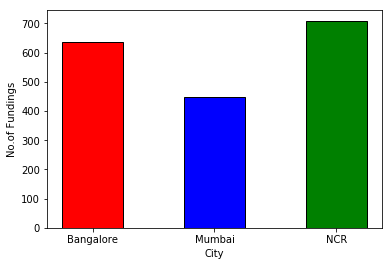

In [4]:
df_loc=df[df['City'].isin(Locations)]
df_city_funds=df_loc.groupby(df_loc['City'])['City'].count()
df_city_funds['NCR']=df_city_funds['Gurgaon']+df_city_funds['Noida']+df_city_funds['New Delhi']
del df_city_funds['Gurgaon']
del df_city_funds['Noida']
del df_city_funds['New Delhi']
print(df_city_funds.idxmax())
print('\n',df_city_funds)
plt.bar(df_city_funds.index,df_city_funds.values,width=0.5,color=['red','blue','green','orange','purple'],edgecolor='black')
plt.xlabel('City')
plt.ylabel('No.of Fundings')
plt.show()

# Justification:
#### As we AIM to find the location in cities including Bangalore, Mumbai, and NCR(Gurgaon, Noida, New Delhi) where startups has received funding maximum number of times. 
### So, according to the result NCR received funding maximum number of times with count of 709.
### As count of fundings received by given cities is as followed:
#### Bangalore    637
#### Mumbai        449
#### NCR              709

# Ques 2:
#### Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 52
Accel Partners 44
Blume Ventures 35
SAIF Partners 35
Kalaari Capital 32


C:\Users\Anisha\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


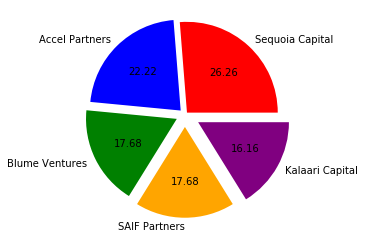

In [5]:
df_loc['InvestorsName'].fillna('N/A',inplace=True)
Investors=df_loc['InvestorsName']
dict_inv={}
for j in Investors:
    if j!='N/A':
        a=j.strip().split(',')
        for i in a:
            if i!='':
                key= i.strip()
                dict_inv[key]=dict_inv.get(key,0) + 1
top5_inv=nlargest(5,dict_inv,key=dict_inv.get)
lst=[]
for i in top5_inv:
    print(i,dict_inv[i])
    lst.append(dict_inv[i])
explode=(0.05,0.1,0.15,0.2,0.25)
plt.pie(lst,explode=explode,labels=top5_inv,radius=1.5,autopct='%.2f',colors=('red','blue','green','orange','purple'))
plt.axis('equal')
plt.show()

# Justification:
#### As we AIM to find the top 5 investors who have invested maximum number of times at location in cities including Bangalore, Mumbai, and NCR(Gurgaon, Noida, New Delhi). 
### So, according to the result Sequoia Capital invested maximum number of times with count of 52 and percentage of 26.26 mong top 5 investors.
### Also,Top 5 investors are as followed:
#### Sequoia Capital 52
#### Accel Partners 44
#### Blume Ventures 35
#### SAIF Partners 35
#### Kalaari Capital 32

## Ques 3:
#### After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 40
Accel Partners 38
Blume Ventures 32
Indian Angel Network 31
Kalaari Capital 30


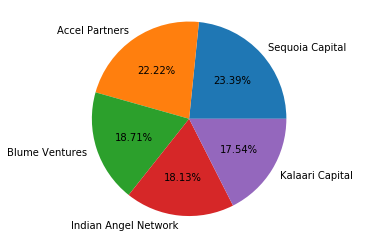

In [6]:
df_loc['InvestorsName'].fillna('N/A',inplace=True)
# make a dict with start up name as key and list of investor names as value
dict_st = {}
for i in range(len(df_loc)):
    startup_name = df_loc.iloc[i]['StartupName']
    if(startup_name == ''):
        continue
    investors = df_loc.iloc[i]['InvestorsName']
    if ',' not in investors:
        if startup_name in dict_st:
            dict_st[startup_name].append(investors)
        else:
            dict_st[startup_name] = [investors]
    else:
        x = investors.split(',')
        for j in x:
            j = j.strip()
            if startup_name in dict_st:
                dict_st[startup_name].append(j)
            else:
                dict_st[startup_name] = [j]

dict_investors = {}

# loop over the set of the dict of investor names
for i in dict_st:
    for investor_name in set(dict_st[i]):
        if investor_name in dict_investors:
                dict_investors[investor_name] += 1
        elif investor_name!='':
            dict_investors[investor_name] = 1
            
#sortedinvest=sorted(dict_investors.items(),key=lambda val:(val[1],val[0]),reverse=True)
e=dict_investors
x=[]
y=[]
z=sum(sorted(e.values(),reverse=True)[:5])
for i in sorted(e.values(),reverse=True)[:5]:
    for j in e:
        if (e[j]==i) and (j not in x):
            x.append(j)
            y.append(e[j])
            print(j,e[j])
            break
plt.pie(y,labels=x,autopct='%.2f%%')
plt.axis('equal')
plt.show()

# Justification:
#### As we AIM to find the top 5 investors who have invested maximum number of times in different companies at location in cities including Bangalore, Mumbai, and NCR(Gurgaon, Noida, New Delhi). 
### So, according to the result Sequoia Capital  invested maximum number of times in different companies with count of 40 and  percentage of 23.39 among top 5 investors.
### Also,Top 5 investors are as followed:
#### Sequoia Capital 40
#### Accel Partners 38
#### Blume Ventures 32
#### Indian Angel Network 31
#### Kalaari Capital 30

# Ques 4:
#### Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 24
Rajan Anandan 20
LetsVenture 13
Anupam Mittal 13
Kunal Shah 13


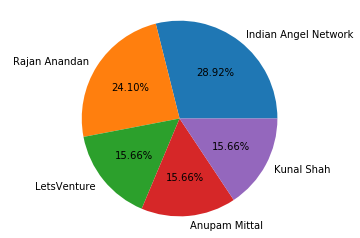

In [7]:
CSFunding=df_loc[(df_loc['InvestmentType']=='Crowd Funding')|(df_loc['InvestmentType']=='Seed Funding')]
dict_st = {}
for i in range(len(CSFunding)):
    startup_name = CSFunding.iloc[i]['StartupName']
    if(startup_name == ''):
        continue
    investors = CSFunding.iloc[i]['InvestorsName']
    if (',' not in investors):
        if startup_name in dict_st:
            dict_st[startup_name].append(investors)
        else:
            dict_st[startup_name] = [investors]
    else:
        x = investors.split(',')
        for j in x:
            j = j.strip()
            if startup_name in dict_st:
                dict_st[startup_name].append(j)
            else:
                dict_st[startup_name] = [j]

dict_investors = {}

# loop over the ser of the dict of investor names
for i in dict_st:
    for investor_name in set(dict_st[i]):
        if investor_name in dict_investors:
                dict_investors[investor_name] += 1
        elif investor_name!='':
            dict_investors[investor_name] = 1
            
#sortedinvest=sorted(dict_investors.items(),key=lambda val:(val[1],val[0]),reverse=True)
del dict_investors['Undisclosed Investors'] 
del dict_investors['Undisclosed investors']
e=dict_investors
x=[]
y=[]
z=sum(sorted(e.values(),reverse=True)[:5])
for i in sorted(e.values(),reverse=True)[:5]:
    for j in e:
        if (e[j]==i) and (j not in x):
            x.append(j)
            y.append(e[j])
            print(j,e[j])
            break
plt.pie(y,labels=x,autopct='%.2f%%')
plt.axis('equal')
plt.show()

# Justification:
#### As we AIM to find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding at location in cities including Bangalore, Mumbai, and NCR(Gurgaon, Noida, New Delhi). 
### So, according to the result Indian Angel Network invested maximum number of times in different companies having investment type Crowdfunding or Seed Funding with count of 24 and  percentage of 28.92 among top 5 investors.
### Also,Top 5 investors are as followed:
#### Indian Angel Network 24
#### Rajan Anandan 20
#### Kunal Shah 13
#### Anupam Mittal 13
#### LetsVenture 13

# Ques 5:
#### Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 38
Accel Partners 34
Kalaari Capital 26
Blume Ventures 24
SAIF Partners 22


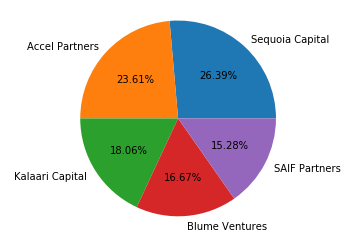

In [8]:
PEFunding=df_loc[(df_loc['InvestmentType']=='Private Equity')]
dict_st = {}
for i in range(len(PEFunding)):
    startup_name = PEFunding.iloc[i]['StartupName']
    if(startup_name == ''):
        continue
    investors = PEFunding.iloc[i]['InvestorsName']
    if ',' not in investors:
        if startup_name in dict_st:
            dict_st[startup_name].append(investors)
        else:
            dict_st[startup_name] = [investors]
    else:
        x = investors.split(',')
        for j in x:
            j = j.strip()
            if startup_name in dict_st:
                dict_st[startup_name].append(j)
            else:
                dict_st[startup_name] = [j]

dict_investors = {}

# loop over the ser of the dict of investor names
for i in dict_st:
    for investor_name in set(dict_st[i]):
        if investor_name in dict_investors:
                dict_investors[investor_name] += 1
        elif investor_name!='':
            dict_investors[investor_name] = 1
            
sortedinvest=sorted(dict_investors.items(),key=lambda val:(val[1],val[0]),reverse=True)
e=dict_investors
x=[]
y=[]
z=sum(sorted(e.values(),reverse=True)[:5])
for i in sorted(e.values(),reverse=True)[:5]:
    for j in e:
        if (e[j]==i) and (j not in x):
            x.append(j)
            y.append(e[j])
            print(j,e[j])
            break
plt.pie(y,labels=x,autopct='%.2f%%')
plt.axis('equal')
plt.show()

# Justification:
#### As we AIM to find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity at location in cities including Bangalore, Mumbai, and NCR(Gurgaon, Noida, New Delhi). 
###  So, according to the result Sequoia Capital invested maximum number of times in different companies having investment type Private Equity with count of 38 and  percentage of 26.39 among top 5 investors.
### Also,Top 5 investors are as followed:
#### Sequoia Capital 38
#### Accel Partners 34
#### Kalaari Capital 26
#### Blume Ventures 24
#### SAIF Partners 22